### SATYAM SINGH

In [1]:
# inporting important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import pylab 
%matplotlib inline


In [2]:
df=pd.read_csv("student_scores.csv")

In [3]:
# first five rows of the df.
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [5]:
# from the coorelation matrix we can see that features 'Hours' and 'Scores' are highly correlated.
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [6]:
## Here 'Hours' is independent feature and 'Scores' is dependent feature
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
# we can observe that our dataset has no missing values as well as no categorical features 
df.isna().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
# Models like Linear Regression presume that data is normally distributed and so to get more from such model, we should 
# transform the data so that it is normally distributed.

## Here we can observe that the curve is not truly bell shaped. It means that our data is not normally distributed.
## We can 'Normalize' Non-Gaussian features and 'Standardize' Gaussian-like features. This will help us increase the accuracy of 
## our model.

In [9]:
## The Shapiro Wilk test is the most powerful test when testing for a normal distribution. 
## It has been developed specifically for the normal distribution.
## 1. If the P-Value of the Shapiro Wilk Test is larger than 0.05, we assume a normal distribution
## 2. If the P-Value of the Shapiro Wilk Test is smaller than 0.05, we do not assume a normal distribution

In [10]:
from scipy import stats 

shapiro_test1 = stats.shapiro(df['Hours'])

print('\n',shapiro_test1)


 ShapiroResult(statistic=0.9401376247406006, pvalue=0.1491180658340454)


In [11]:
### from above it is clear that 'Hours' is normally distributed.

In [12]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(df[['Hours']], df['Scores'], test_size = 0.25, random_state = 0)

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x1_train, y1_train)
y_pred = lr.predict(x1_test)
print('Accuracy : {:.3f}%'.format(lr.score(x1_test, y1_test)*100))

Accuracy : 93.677%


In [14]:
# Comparing Actual vs Predicted
df_t = pd.DataFrame({'Actual': y1_test, 'Predicted': y_pred})  
df_t

,Actual,Predicted
5,20,16.844722
2,27,33.745575
19,69,75.500624
16,30,26.786400
11,62,60.588106
22,35,39.710582
17,24,20.821393


In [15]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y1_test, y_pred))


Mean Absolute Error: 4.130879918502486


In [16]:
print('Variance score :%3f'% lr.score(x1_test,y1_test))

Variance score :0.936766


In [17]:
df = df[['Hours', 'Scores']]

In [18]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [19]:
# Best Fit Line

In [20]:
independent=df.iloc[:,:-1].values
dependent=df.iloc[:,1].values

In [21]:
line= np.sum(np.multiply(lr.coef_,independent)+lr.intercept_, axis = 1, keepdims = True)

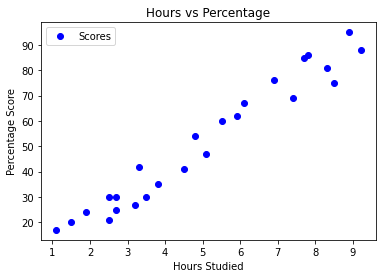

In [22]:
df.plot(x='Hours', y='Scores',style='ob' )    
plt.title('Hours vs Percentage')    
plt.xlabel('Hours Studied')    
plt.ylabel('Percentage Score')    
plt.show()

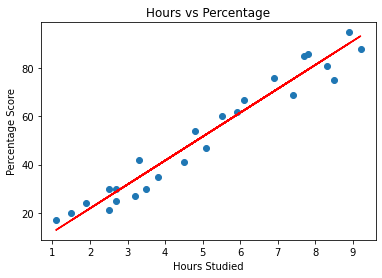

In [23]:
plt.title('Hours vs Percentage')    
plt.xlabel('Hours Studied')    
plt.ylabel('Percentage Score') 
plt.scatter(independent[:,0],dependent,)
plt.plot(independent[:,0],line,'r-')
plt.show()

In [24]:
# You can also test with your own data
hours = 9.25
own_pred = lr.predict([[hours]])
print("No. of Hours = {}".format(hours))
if own_pred>=100:
    print("Predicted Score = ",100)
else:
    print("Predicted Score = {}".format(own_pred[0]))

No. of Hours = 9.25
Predicted Score = 93.89272889341655


## TASK 1 COMPLETED